# Churn Analysis in Telecom Industry

## Dataset Description

the dataset was taken from kagggle datasets (https://www.kaggle.com/datasets/blastchar/telco-customer-churn)
- Each row represents a customer, each column contains customer’s attributes described on the column Metadata.

The data set includes information about:

- Customers who left within the last month – the column is called Churn
- Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
- Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
- Demographic info about customers – gender, age range, and if they have partners and dependents


## Import required libraries

In [1]:
#import the required libraries
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image
import itertools
import io
import plotly.offline as py # visualization
py.init_notebook_mode(connected=True) # visualization
import plotly.graph_objs as go # visualization
from plotly.subplots import make_subplots
import plotly.figure_factory as ff # visualization


## Load the datset

In [2]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

## overview of the data

In [3]:
#look at the top 5 records of the data
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
#Check the various attributes of data like shape (rows and cols), Columns, datatypes
df.shape

(7043, 21)

In [5]:
df.columns.values


array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [6]:
# Checking the data types of all the columns
df.dtypes


customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

#**Insights**
- here its strange that 'TotalCharges' column is object instead of float or int
- 'SeniorCitizen' column is integer but it should be object


In [7]:
#check for null values
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

- it seems that there're not any missing values in the dataset
- but as mentioned earlier, the 'TotalCharges' column is in object format so first change it to float or int & will again recheck 

In [8]:
#convert 'TotalCharges' to float
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors='coerce')


In [9]:
#checking for null values in the dataset
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

- 'TotalCharges' column has 11 missing values
- from superficial observation it seems that all other columns doesn't have any missing values


In [10]:
df[df.isnull().any(axis=1)]


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


**Insights**
- Now, we know that this dataset has some null value in TotalCharges variable. But if we look again at these null rows, we know that it is make sense, because all of this customer has 0 in tenure which means these are new customer, so they haven't paid any to the company. Because of that, i will just change these null value to 0

In [11]:
df['TotalCharges'] = df['TotalCharges'].fillna(0)


In [12]:
# Check the descriptive statistics of numeric variables
df.describe()


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


**Insights**
- SeniorCitizen is actually a categorical hence the 25%-50%-75% distribution is not proper

- 75% customers have tenure less than 55 months

- Average Monthly charges are USD 64.76 whereas 25% customers pay more than USD 89.85 per month

#### Count of churned vs non-churned customers

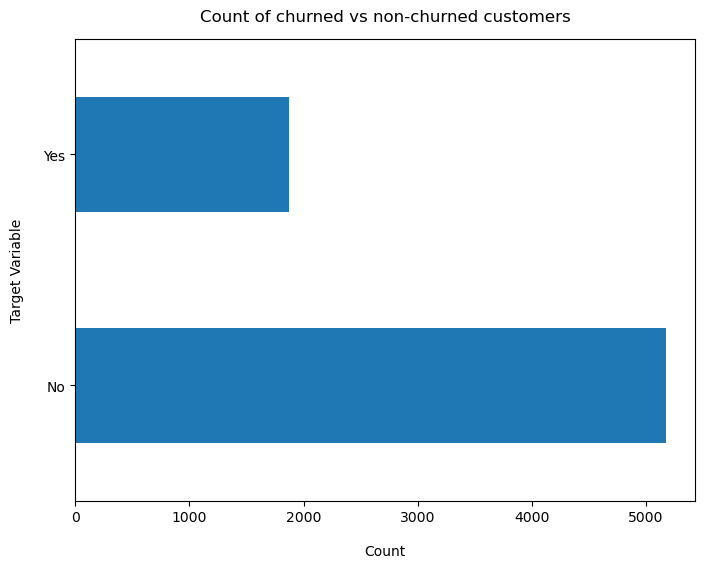

In [13]:
df['Churn'].value_counts().plot(kind='barh', figsize=(8, 6))
plt.xlabel("Count", labelpad=14)
plt.ylabel("Target Variable", labelpad=14)
plt.title("Count of churned vs non-churned customers", y=1.02);


In [14]:
100*df['Churn'].value_counts()/len(df['Churn'])

No     73.463013
Yes    26.536987
Name: Churn, dtype: float64

**Insights**
- Data is highly imbalanced, ratio = 73:27
- So we analyse the data with other features while taking the target values separately to get some insights.


In [15]:
# Concise Summary of the dataframe, as we have too many columns, we are using the verbose = True mode
df.info(verbose = True) 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# Data Cleaning

 1). **Divide customers into bins based on tenure:**
- tenure < 12 months: assign a tenure group if 0-12, 
- for tenure between 1 to 2 Yrs, tenure group of 13-24;
- for tenure between 2 to 3 Yrs, tenure group of 25-36;
- for tenure between 3 to 4 Yrs, tenure group of 37-48;
- for tenure between 4 to 5 Yrs, tenure group of 49-60;
- for tenure more than 5 yrs, tenure group of 60+;


In [16]:
# Get the max tenure
print(df['tenure'].max())

72


In [17]:
# Group the tenure in bins of 12 months
labels = ["{0} - {1}".format(i, i + 11) for i in range(1, 72, 12)]

df['tenure_group'] = pd.cut(df.tenure, range(1, 80, 12), right=False, labels=labels)


In [18]:
df['tenure_group'].value_counts(ascending=False)


1 - 12     2175
61 - 72    1407
13 - 24    1024
25 - 36     832
49 - 60     832
37 - 48     762
Name: tenure_group, dtype: int64

**Insights**
- most of the customers in the dataset new (tenure is less than a year) followed by customers who are loyal to to comapny in terms of tenure (have tenure more than 5 year)

2). **Remove columns not required for processing**

In [19]:
#drop column customerID and tenure
df.drop(columns= ['customerID','tenure'], axis=1, inplace=True)
df.head()


,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1 - 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25 - 36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1 - 12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37 - 48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1 - 12


# Data Exploration

1. **Plot distibution of individual predictors by churn**



## Univariate Analysis


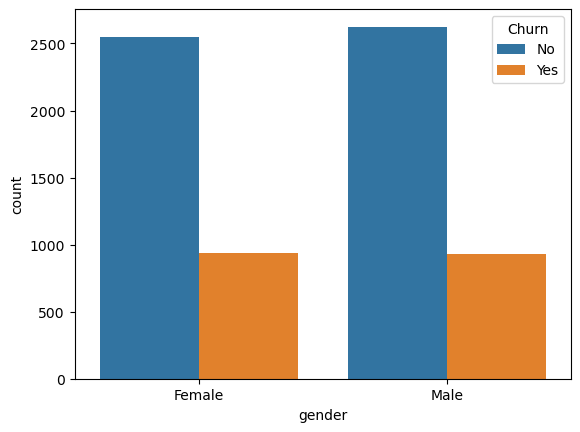

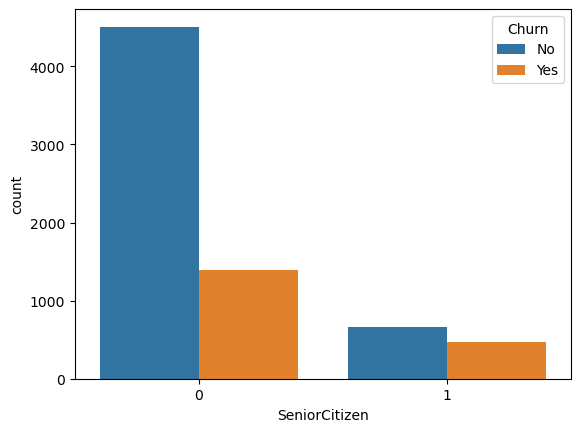

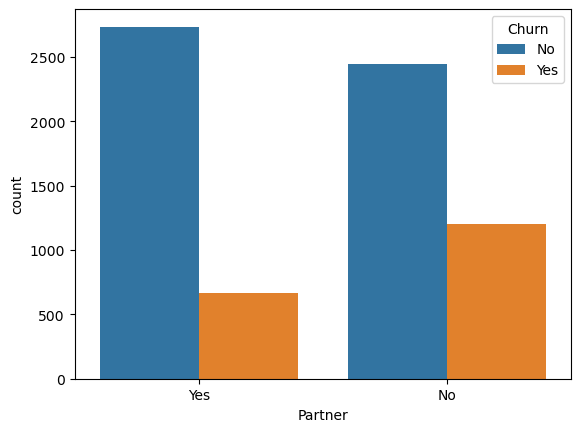

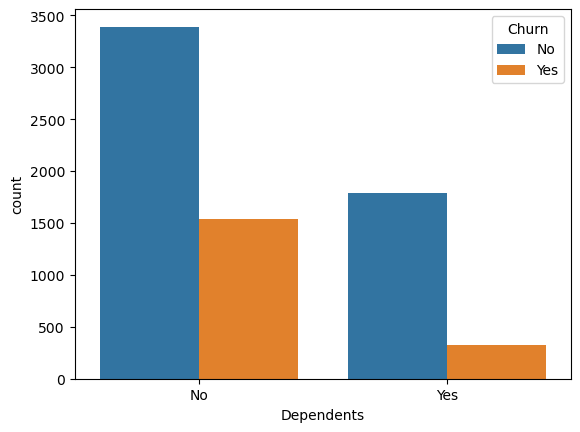

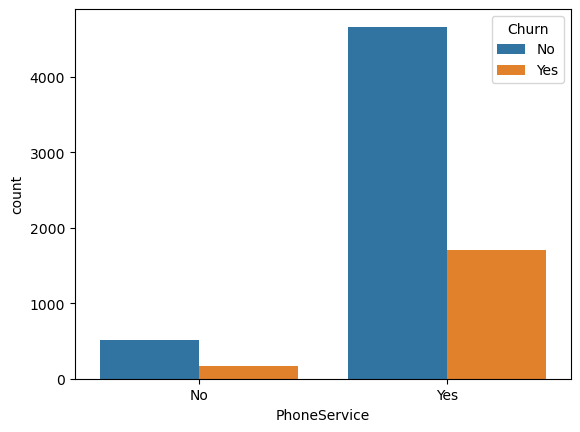

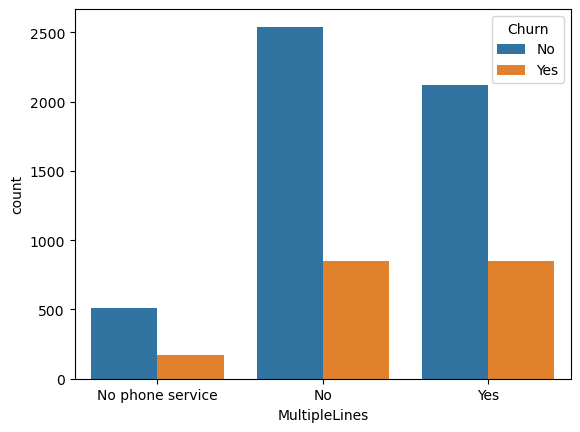

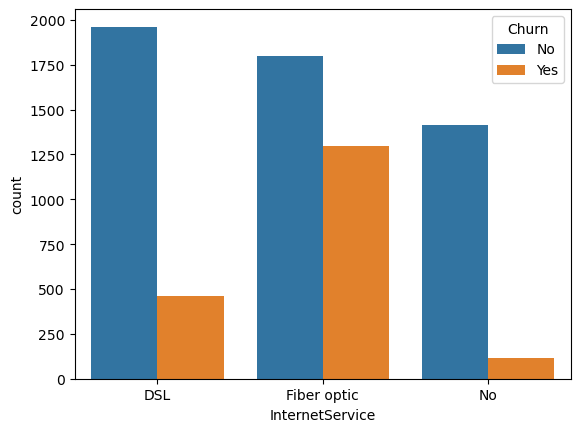

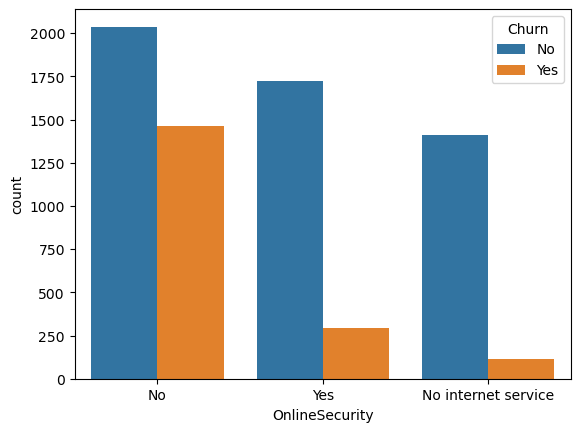

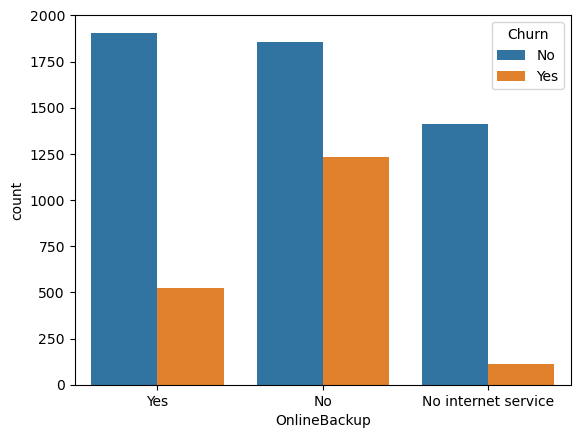

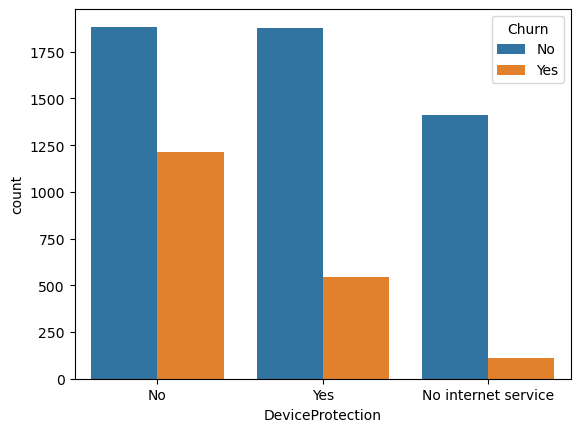

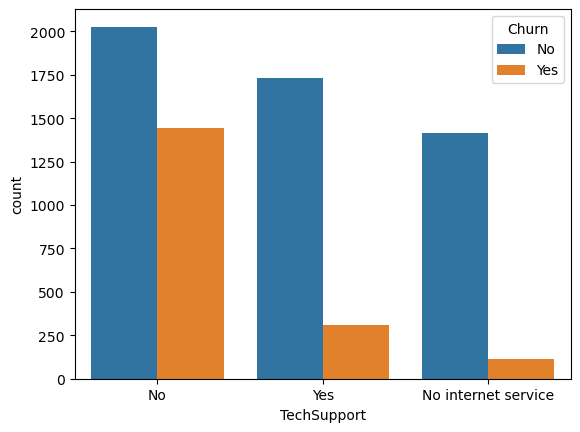

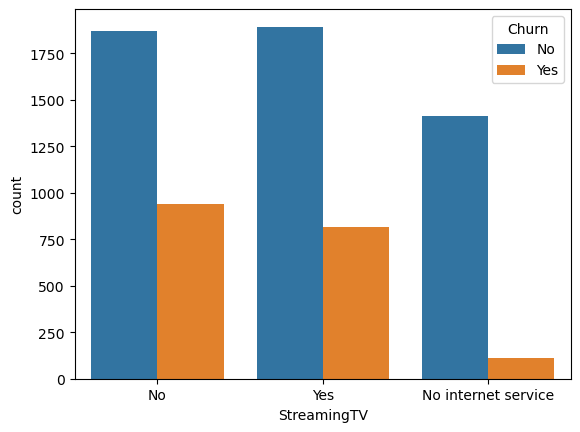

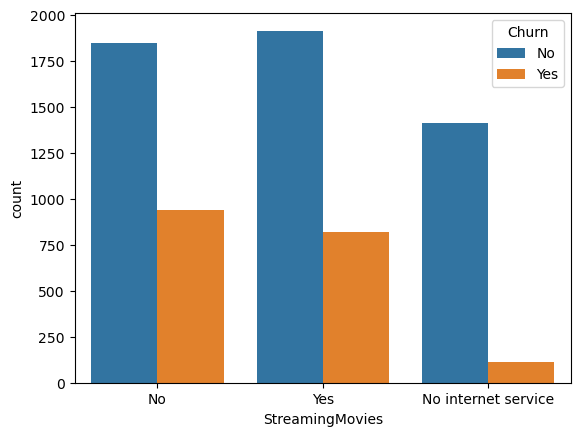

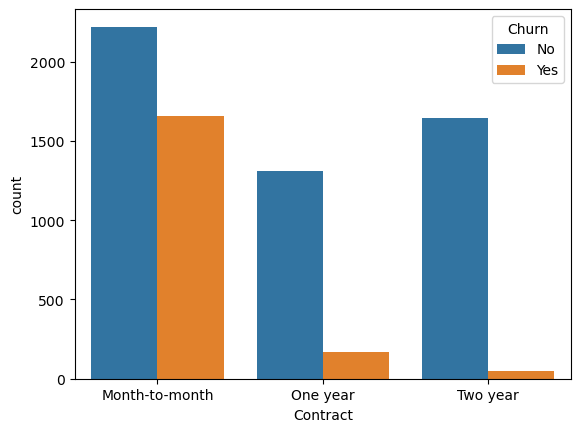

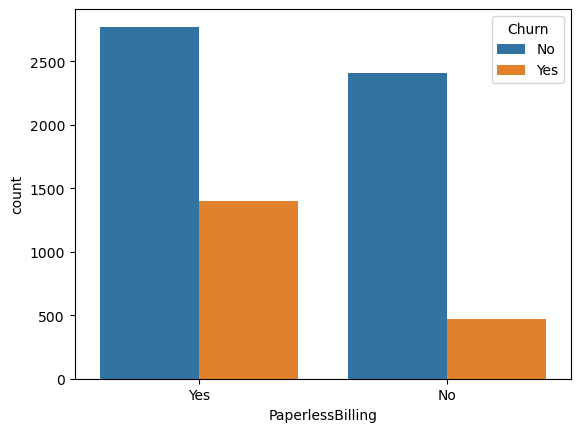

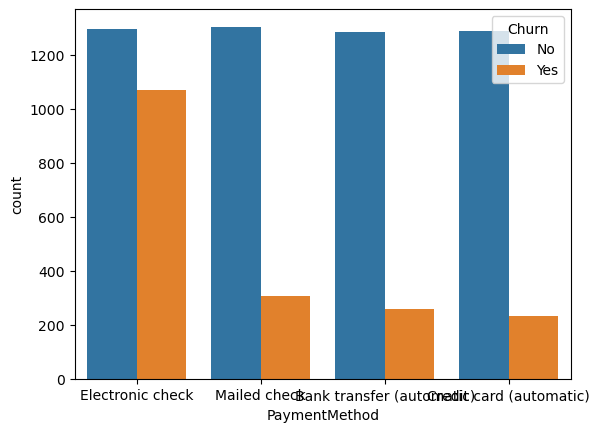

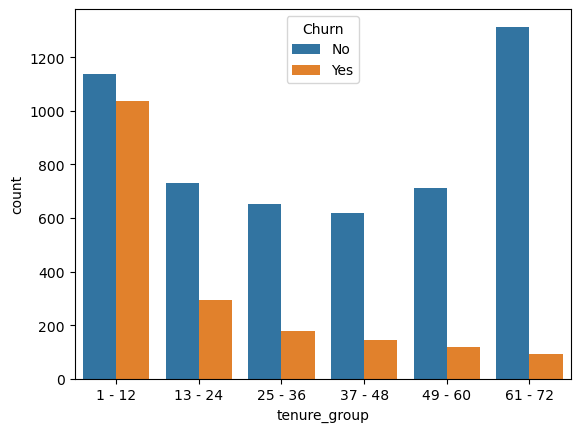

In [20]:
for i, predictor in enumerate(df.drop(columns=['Churn', 'TotalCharges', 'MonthlyCharges'])):
    plt.figure(i)
    sns.countplot(data=df, x=predictor, hue='Churn')


**Conclusion**

- New customers are more likely to Churn
- Customers with higher MonthlyCharges are also more likely to Churn


2). **Convert the target variable 'Churn' in a binary numeric variable i.e. Yes=1 ; No = 0**

In [22]:
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})


3). **Convert all the categorical variables into dummy variables**

In [23]:
df_dummies = pd.get_dummies(df)
df_dummies.head()


,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,29.85,29.85,0,1,0,0,1,1,0,...,0,0,1,0,1,0,0,0,0,0
1,0,56.95,1889.50,0,0,1,1,0,1,0,...,0,0,0,1,0,0,1,0,0,0
2,0,53.85,108.15,1,0,1,1,0,1,0,...,0,0,0,1,1,0,0,0,0,0
3,0,42.30,1840.75,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,1,0,0
4,0,70.70,151.65,1,1,0,1,0,1,0,...,0,0,1,0,1,0,0,0,0,0


**Relationship between Monthly Charges and Total Charges**

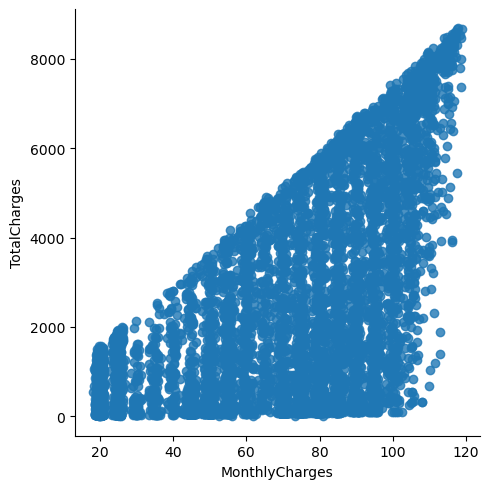

In [24]:
sns.lmplot(data=df_dummies, x='MonthlyCharges', y='TotalCharges', fit_reg=False)

Total Charges increase as Monthly Charges increase - as expected.

**Churn by Monthly Charges**

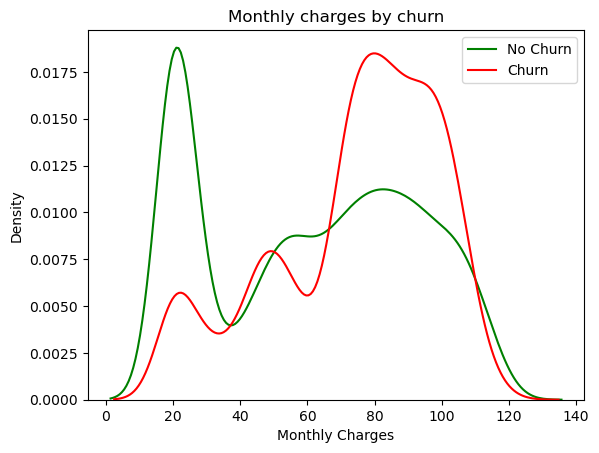

In [25]:
no_churn = df_dummies.MonthlyCharges[(df_dummies["Churn"] == 0)]
churn = df_dummies.MonthlyCharges[(df_dummies["Churn"] == 1)]

# Plot a KDE plot for the 'no_churn' and 'churn' variables
sns.kdeplot(no_churn, color="Green", label="No Churn")
sns.kdeplot(churn, color="Red", label="Churn")

# Add labels and show the plot
plt.legend(loc='upper right')
plt.xlabel('Monthly Charges')
plt.ylabel('Density')
plt.title('Monthly charges by churn')
plt.show()


**Insights**
- churn is high when Monthly Charges are high 
- churn is low when Monthly Charges are low

**Churn by Total Charges**

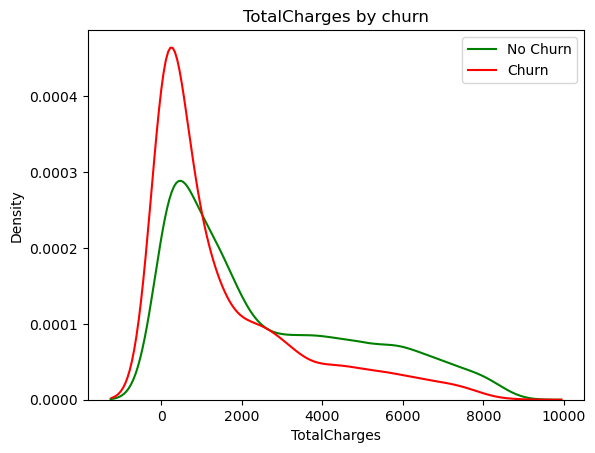

In [29]:
no_churn = df_dummies.TotalCharges[(df_dummies["Churn"] == 0)]
churn = df_dummies.TotalCharges[(df_dummies["Churn"] == 1)]

# Plot a KDE plot for the 'no_churn' and 'churn' variables
sns.kdeplot(no_churn, color="Green", label="No Churn")
sns.kdeplot(churn, color="Red", label="Churn")

# Add labels and show the plot
plt.legend(loc='upper right')
plt.xlabel('TotalCharges')
plt.ylabel('Density')
plt.title('TotalCharges by churn')
plt.show()


Surprising insight as higher Churn at lower Total Charges

 **Churn by Total Charges**

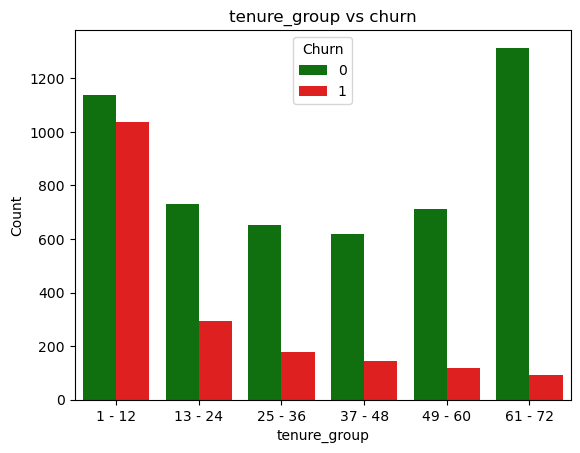

In [34]:
# Plot a countplot for the 'tenure_group' variable, colored by 'Churn'
sns.countplot(x="tenure_group", data=df, palette=["Green", "Red"], hue="Churn")

# Add labels and show the plot
plt.xlabel('tenure_group')
plt.ylabel('Count')
plt.title('tenure_group vs churn')
plt.legend(title='Churn')
plt.show()


However if we combine the insights of 3 parameters i.e. Tenure, Monthly Charges & Total Charges then the picture is bit clear :- Higher Monthly Charge at lower tenure results into lower Total Charge. Hence, all these 3 factors viz Higher Monthly Charge, Lower tenure and Lower Total Charge are linkd to High Churn.

## Build a corelation of all predictors with 'Churn'

<AxesSubplot: >

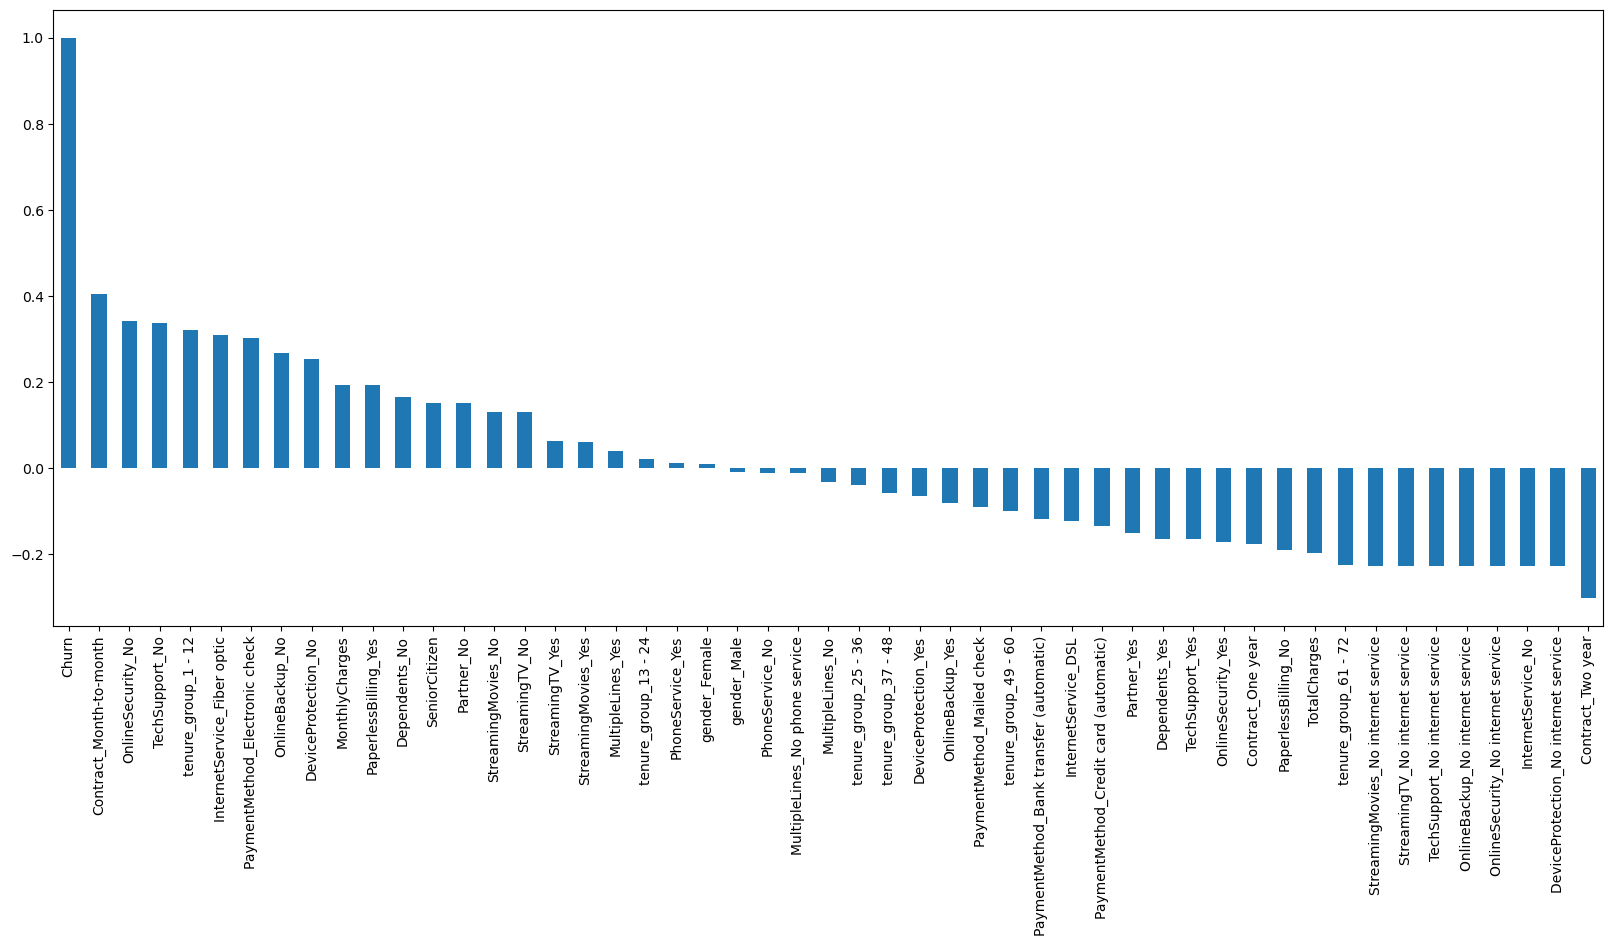

In [38]:
plt.figure(figsize=(20,8))
df_dummies.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

**Insight:**

- HIGH Churn seen in case of Month to month contracts, No online security, No Tech support, First year of subscription and Fibre Optics Internet

- LOW Churn is seens in case of Long term contracts, Subscriptions without internet service and The customers engaged for 5+ years

- Factors like Gender, Availability of PhoneService and multiple lines having no phone service have alomost NO impact on Churn



In [42]:
# Get all categorical columns in the dataset
cat_cols = [col for col in df.columns if df[col].dtype == "object"]


## Bivariate analysis

####################################################################################################
Male      3555
Female    3488
Name: gender, dtype: int64


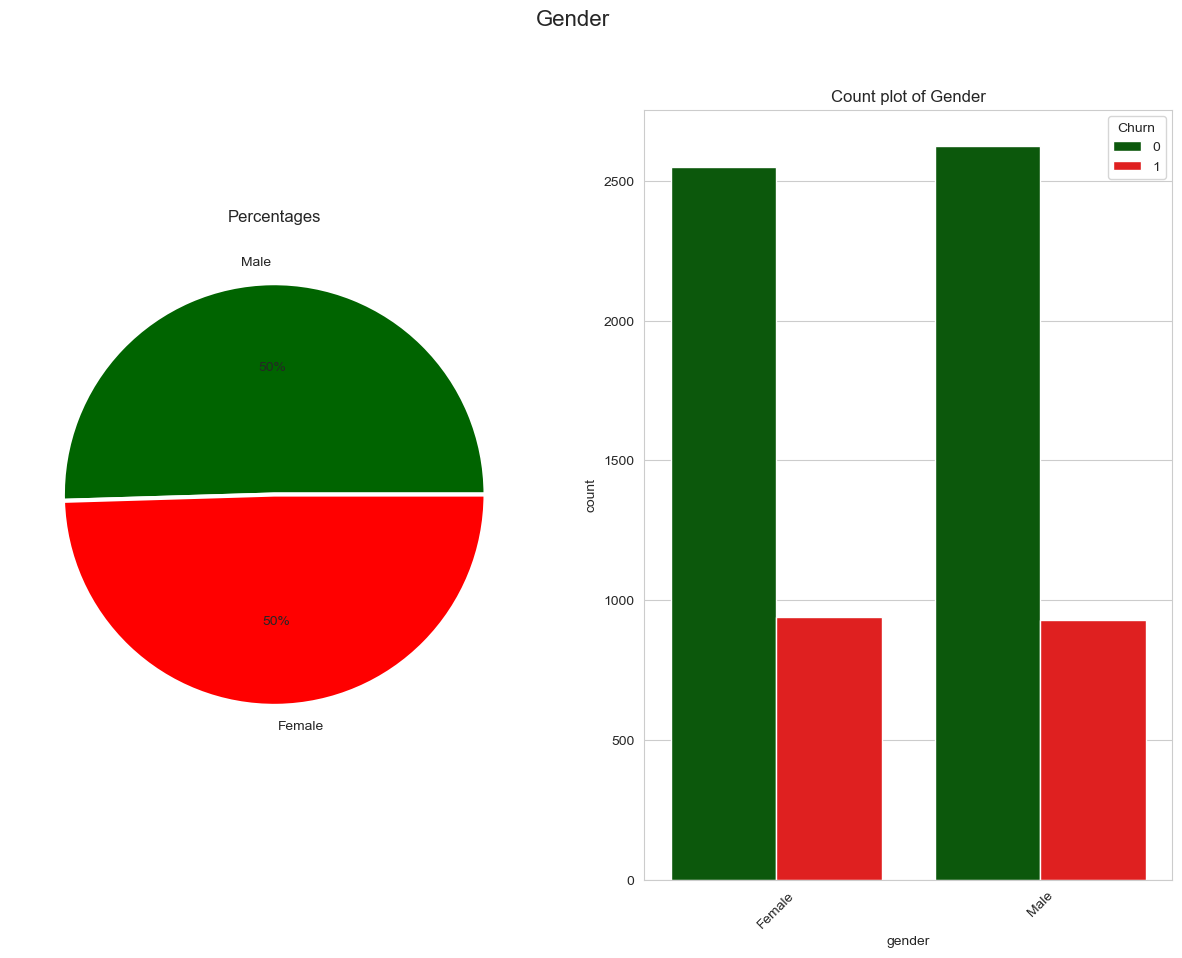

####################################################################################################
No     3641
Yes    3402
Name: Partner, dtype: int64


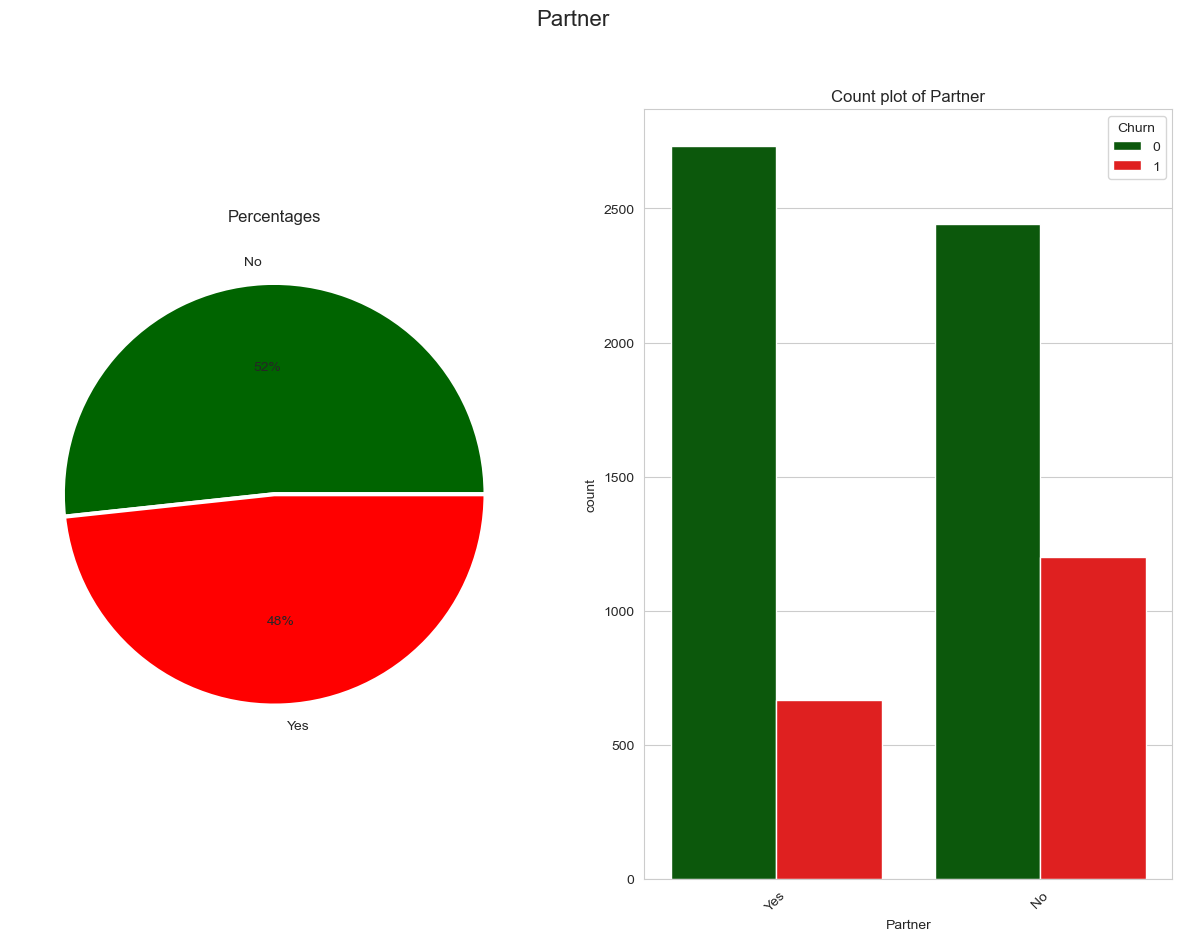

####################################################################################################
No     4933
Yes    2110
Name: Dependents, dtype: int64


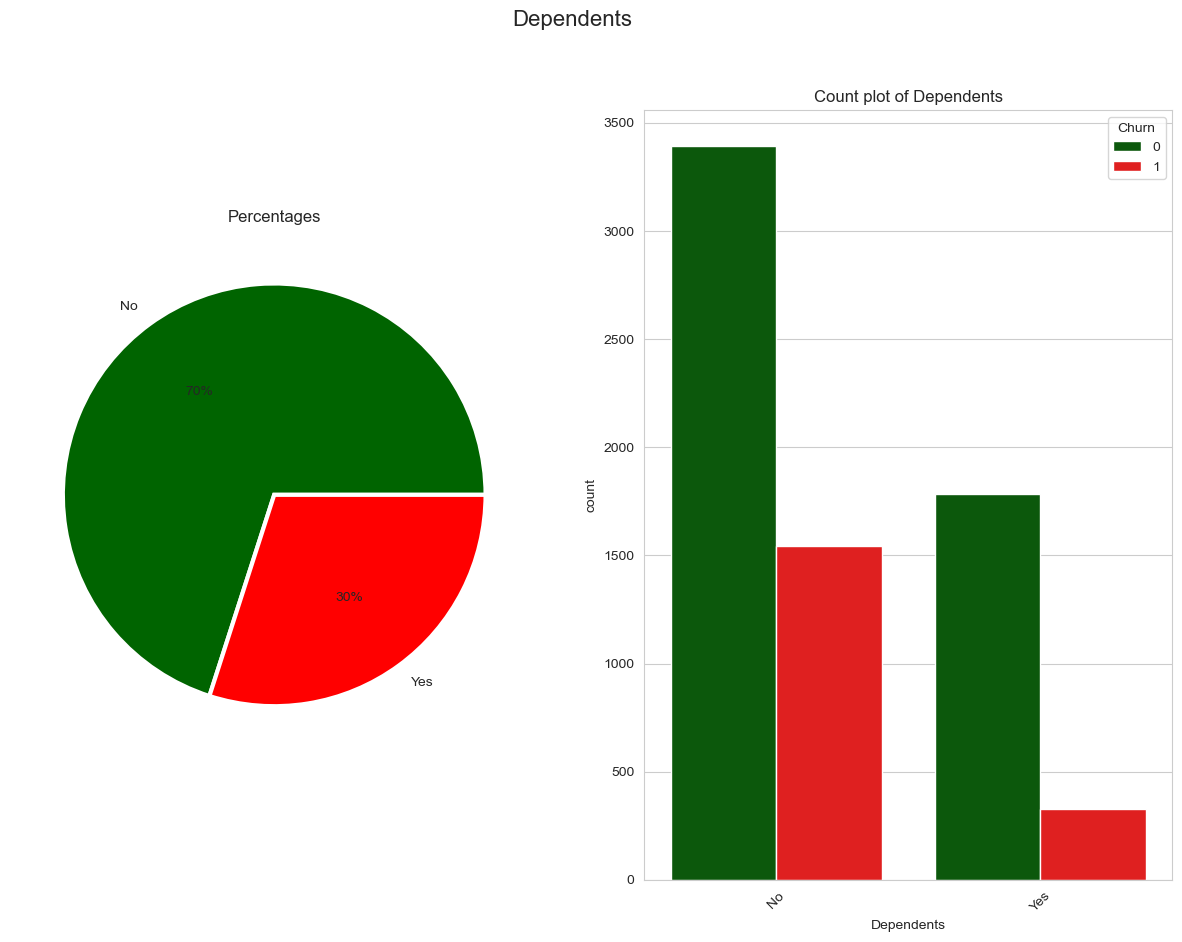

####################################################################################################
Yes    6361
No      682
Name: PhoneService, dtype: int64


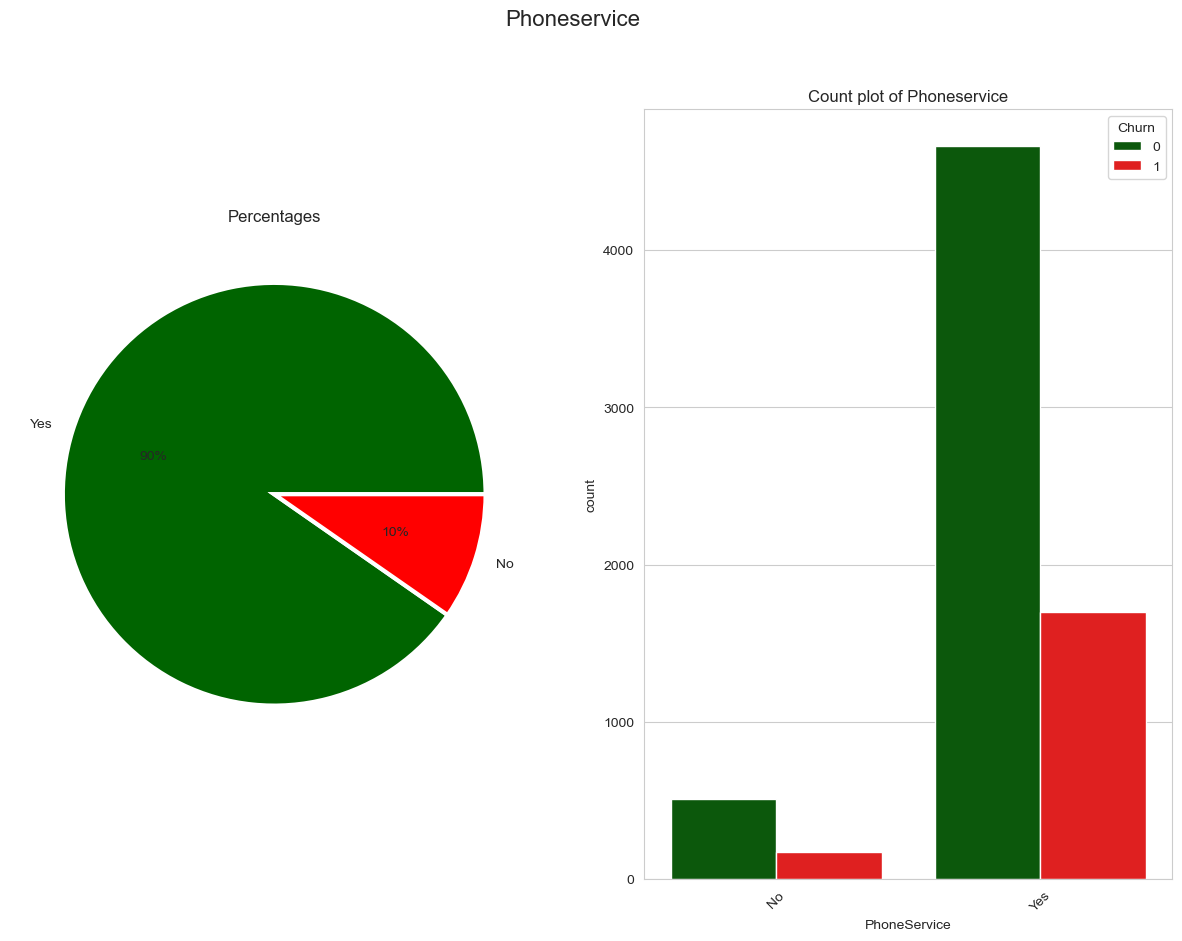

####################################################################################################
No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64


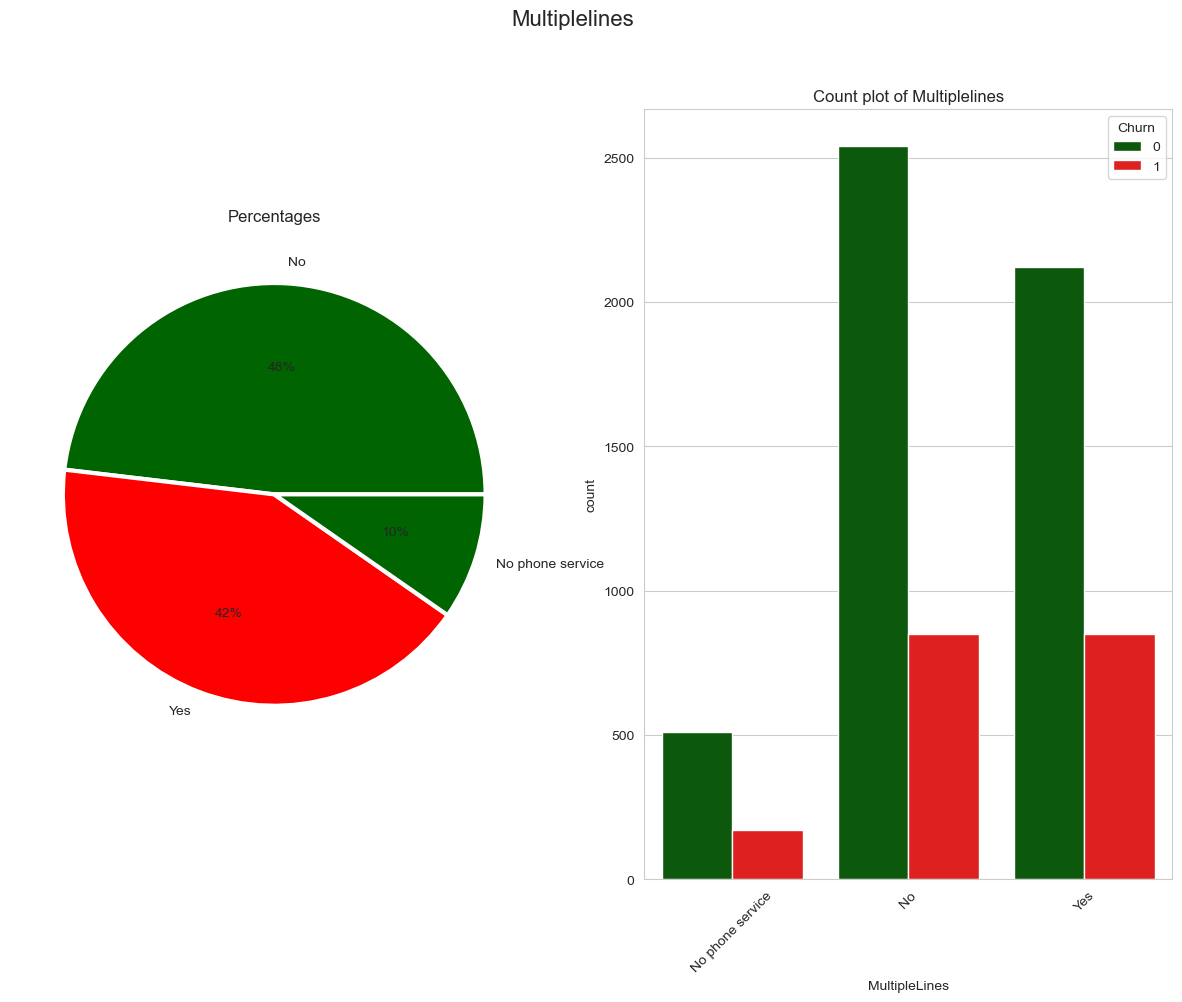

####################################################################################################
Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64


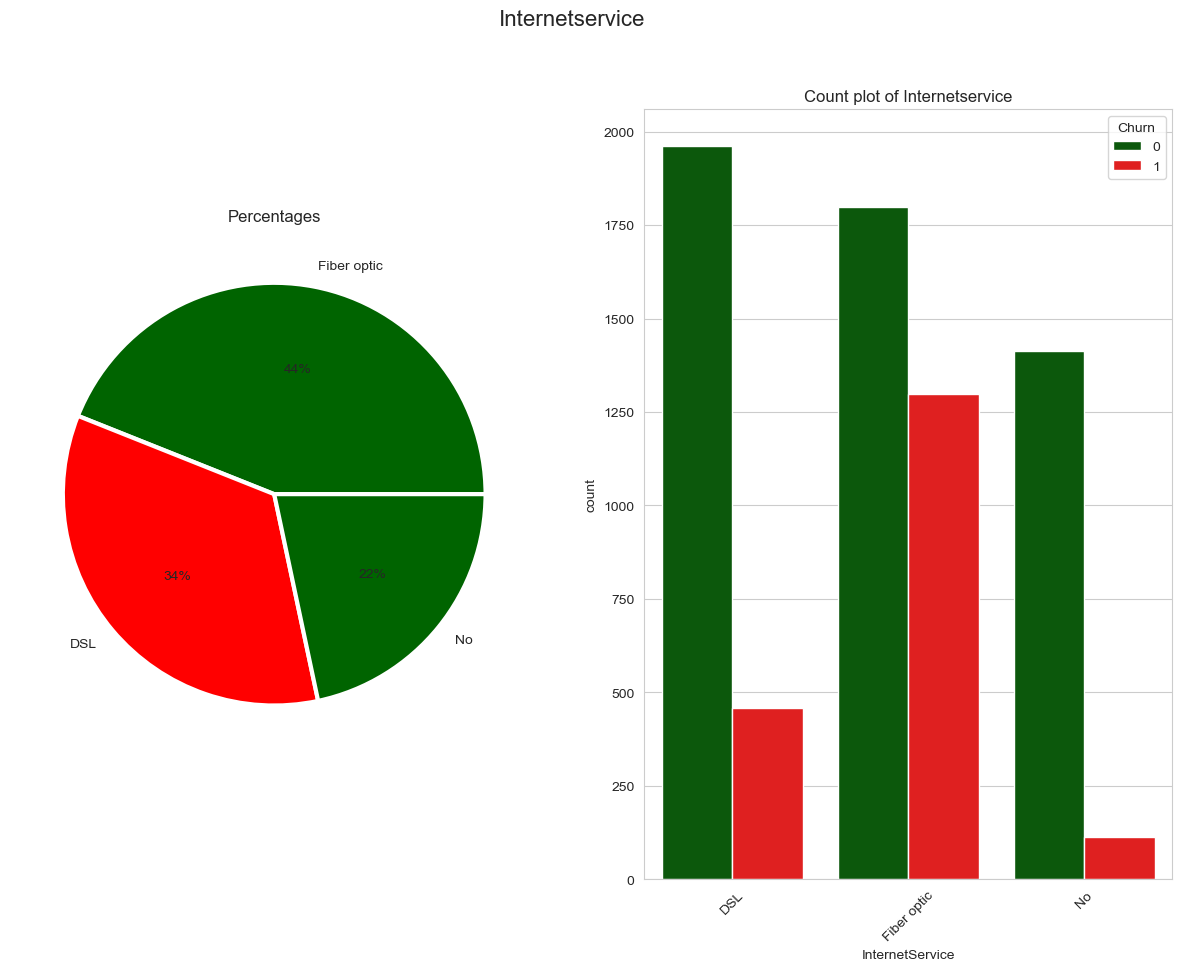

####################################################################################################
No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64


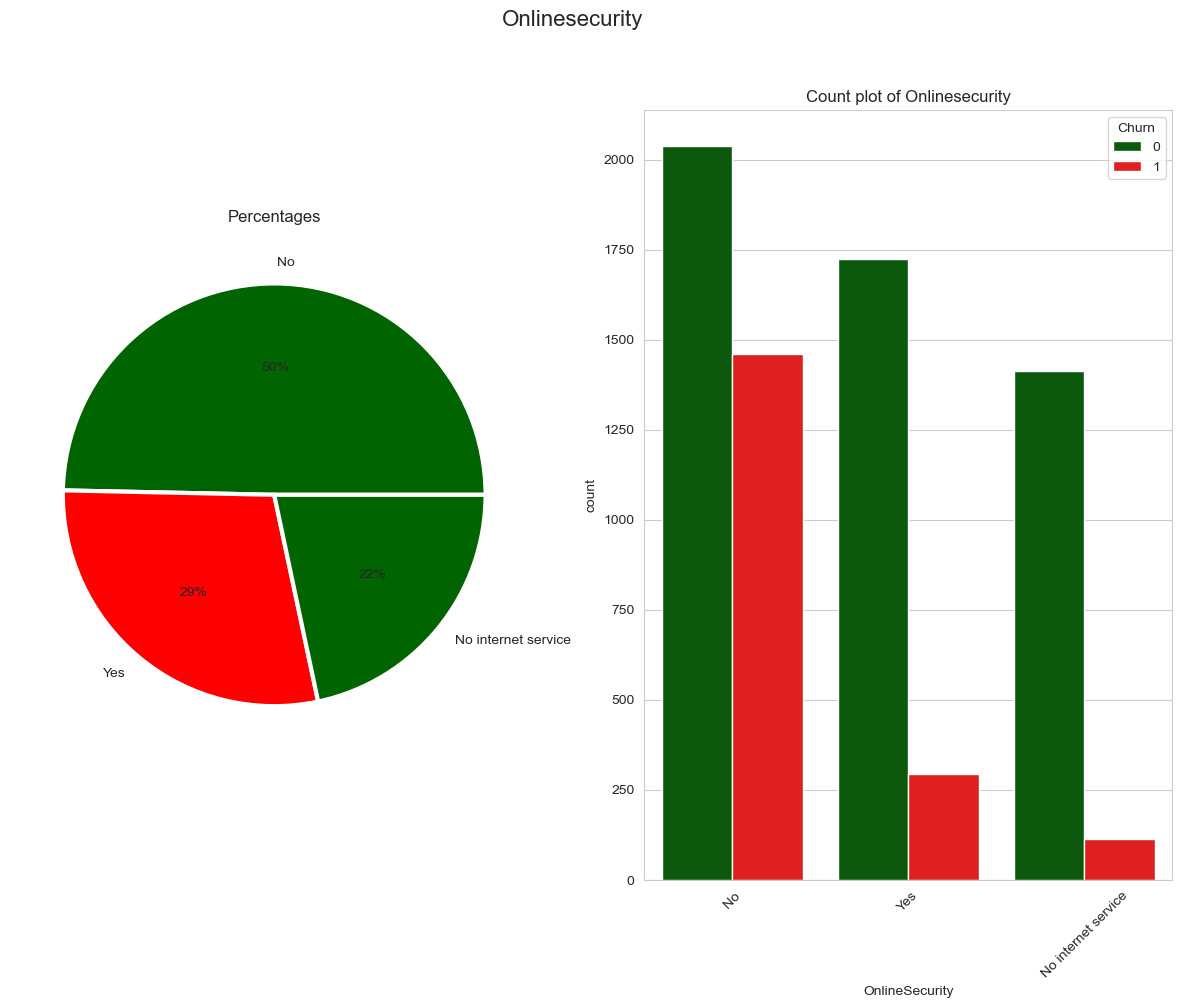

####################################################################################################
No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64


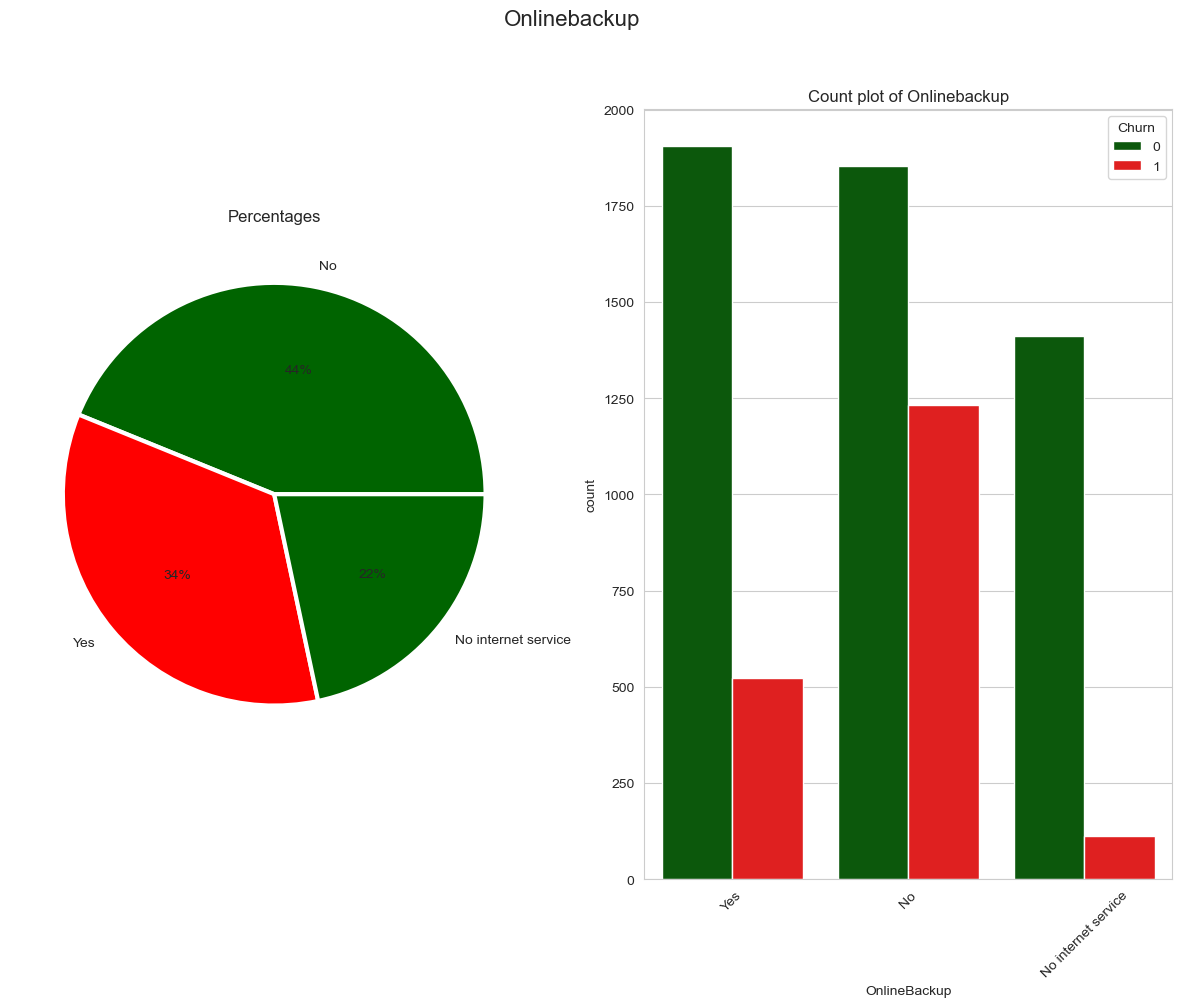

####################################################################################################
No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64


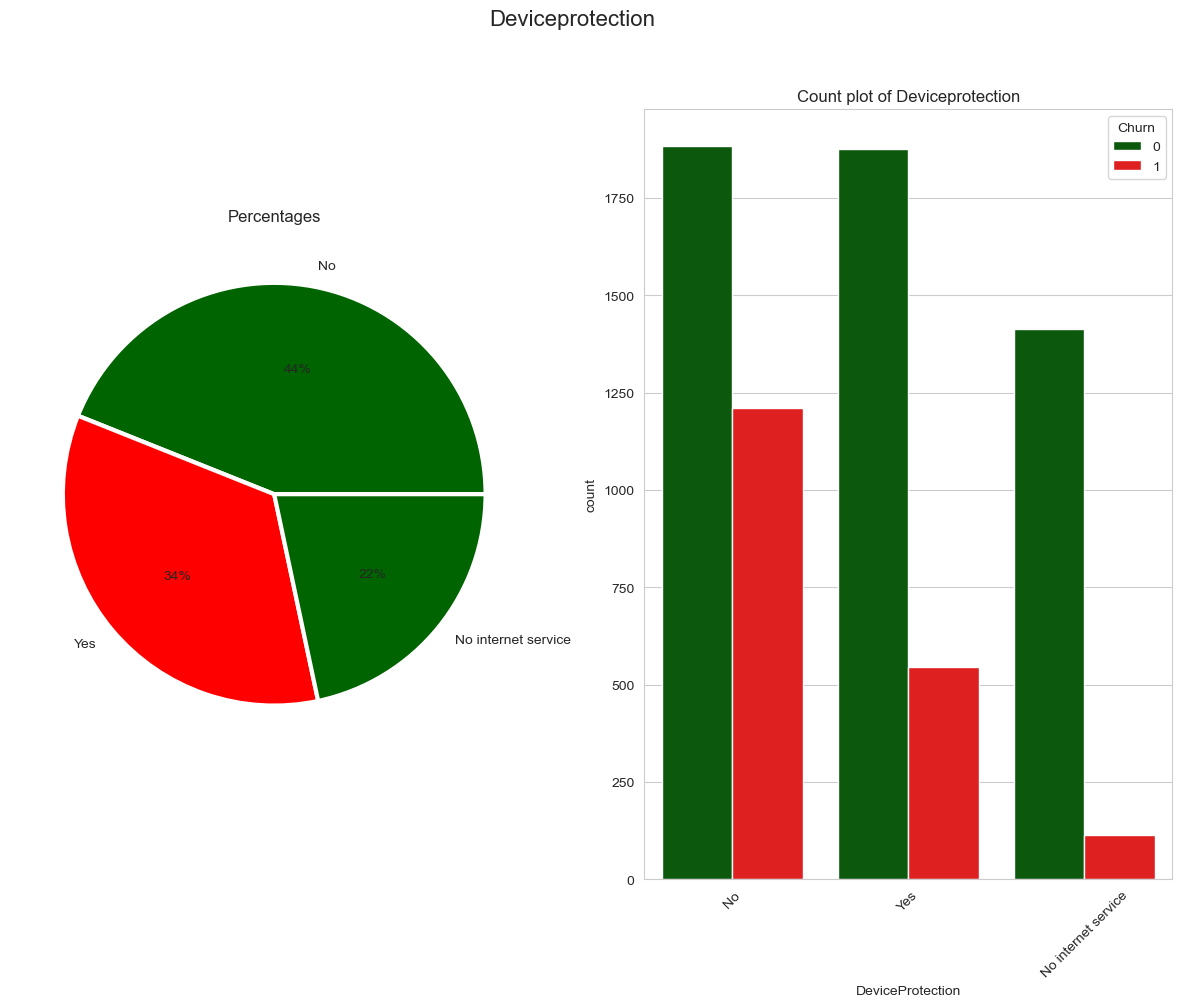

####################################################################################################
No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64


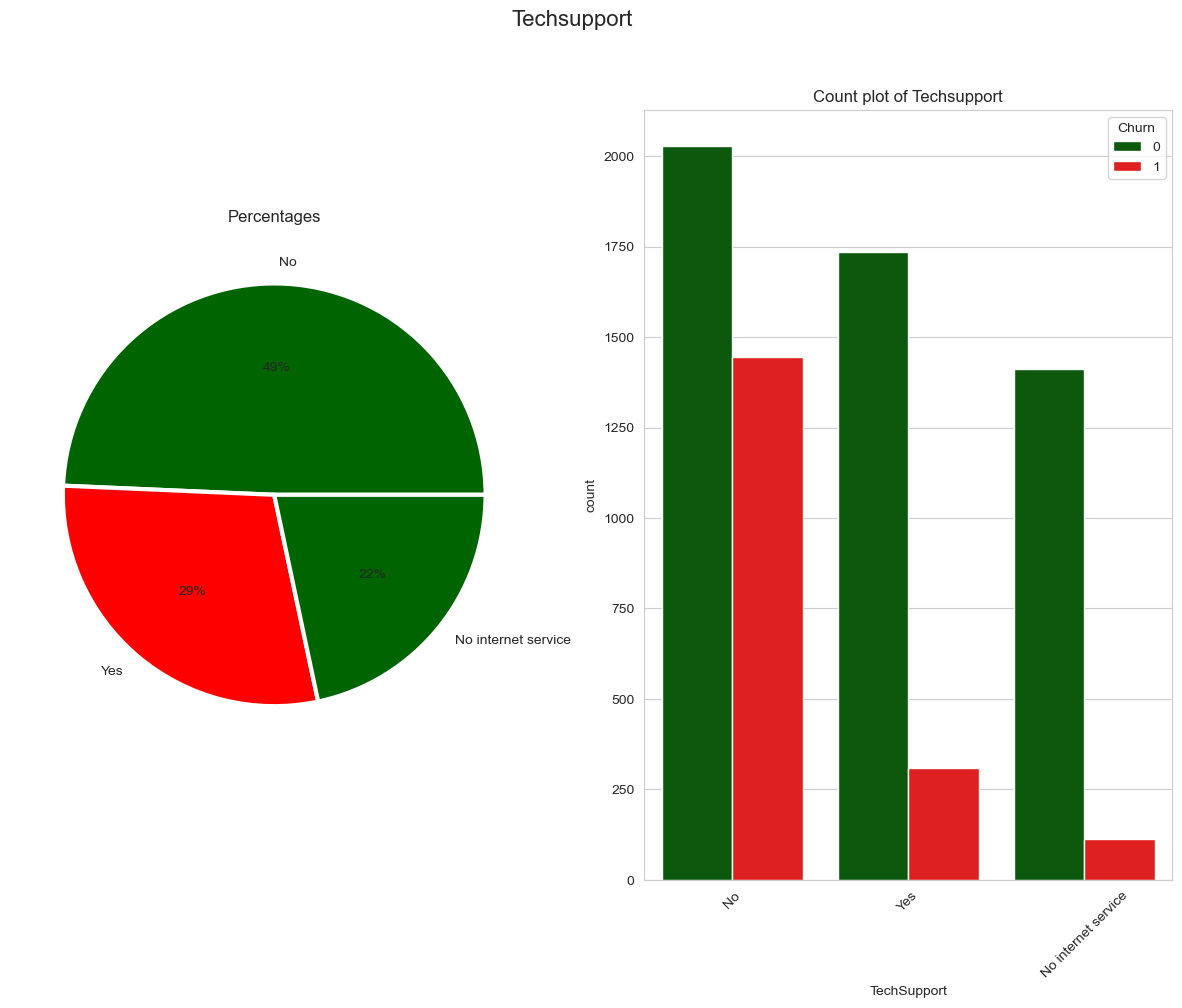

####################################################################################################
No                     2810
Yes                    2707
No internet service    1526
Name: StreamingTV, dtype: int64


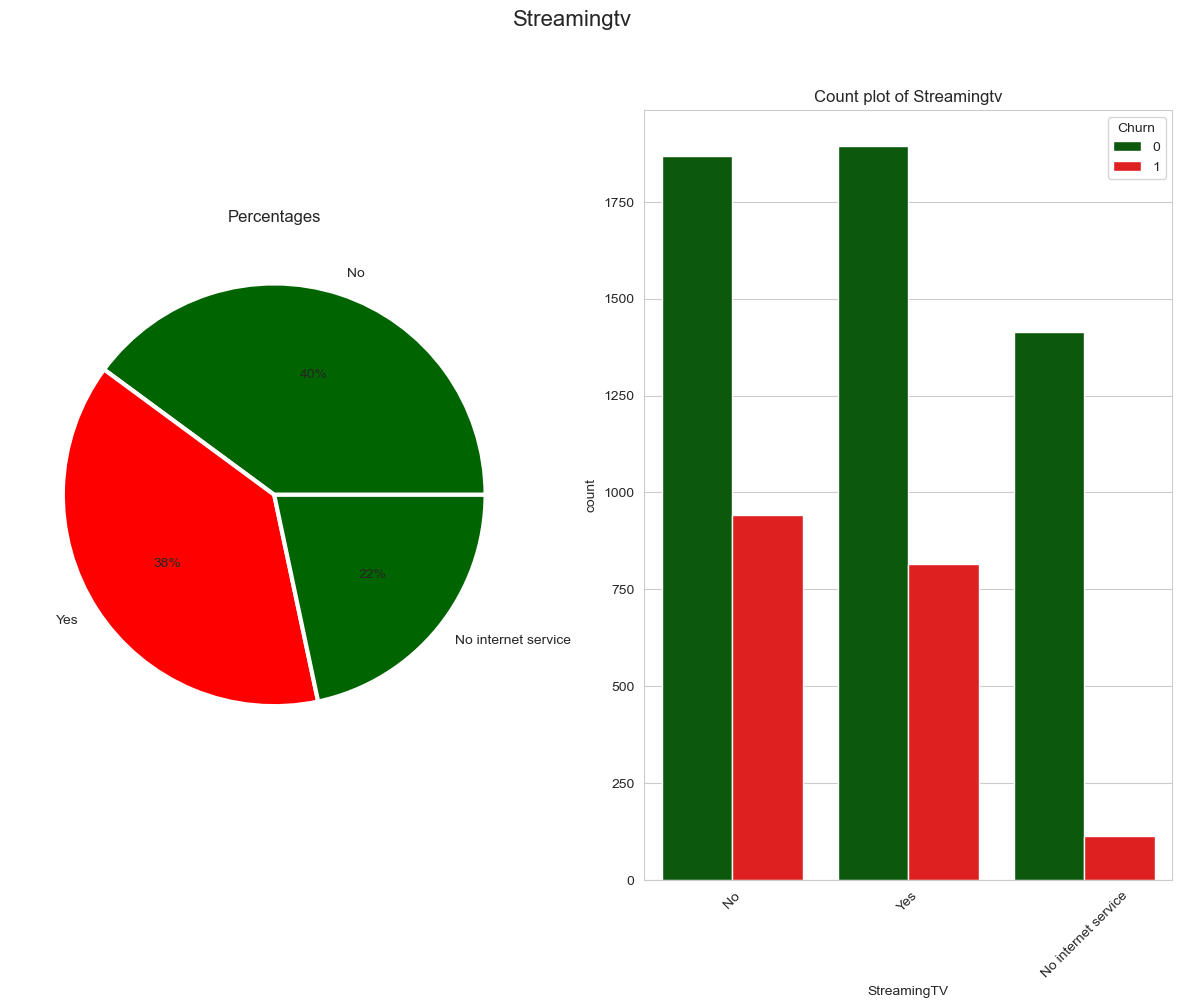

####################################################################################################
No                     2785
Yes                    2732
No internet service    1526
Name: StreamingMovies, dtype: int64


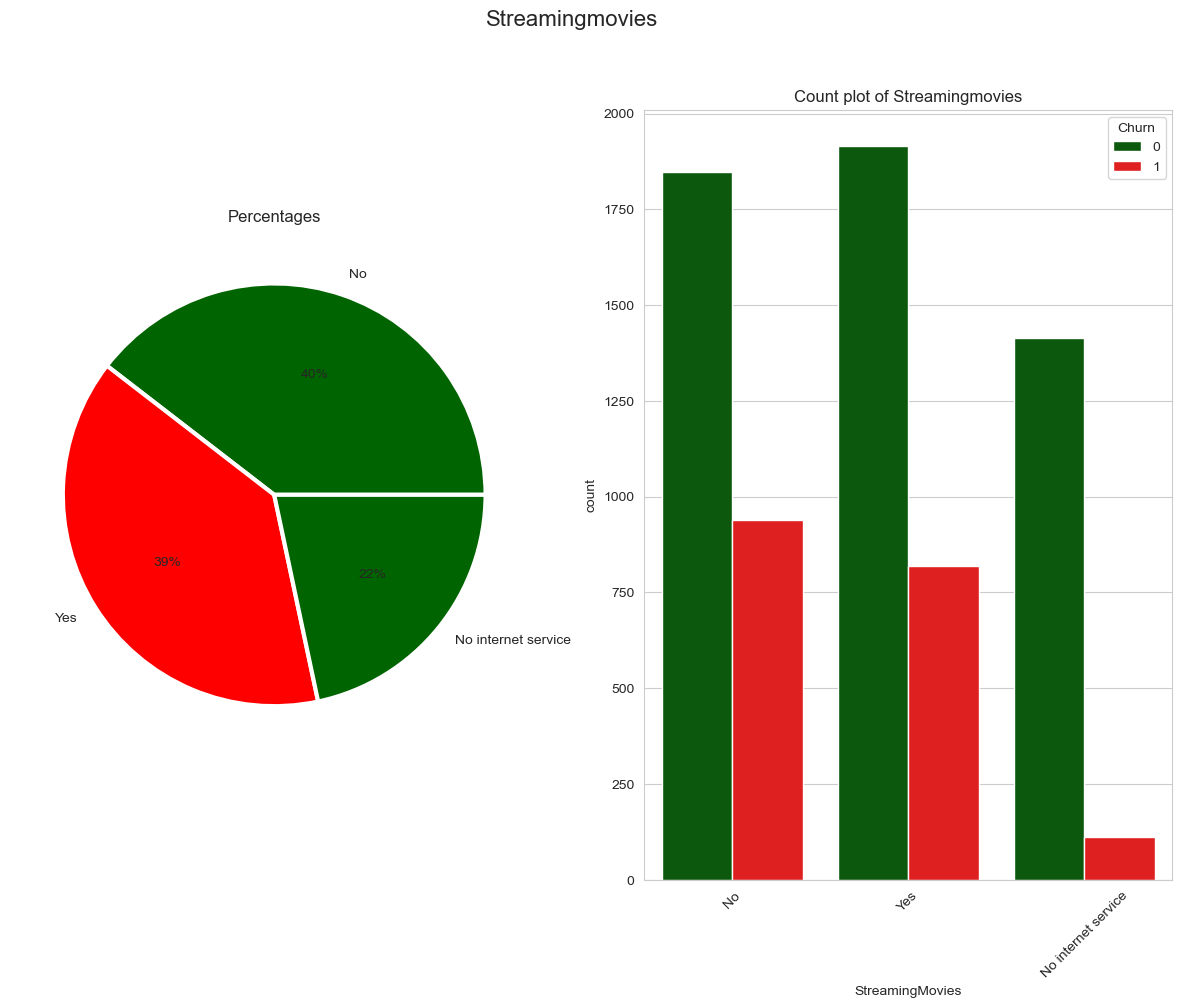

####################################################################################################
Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64


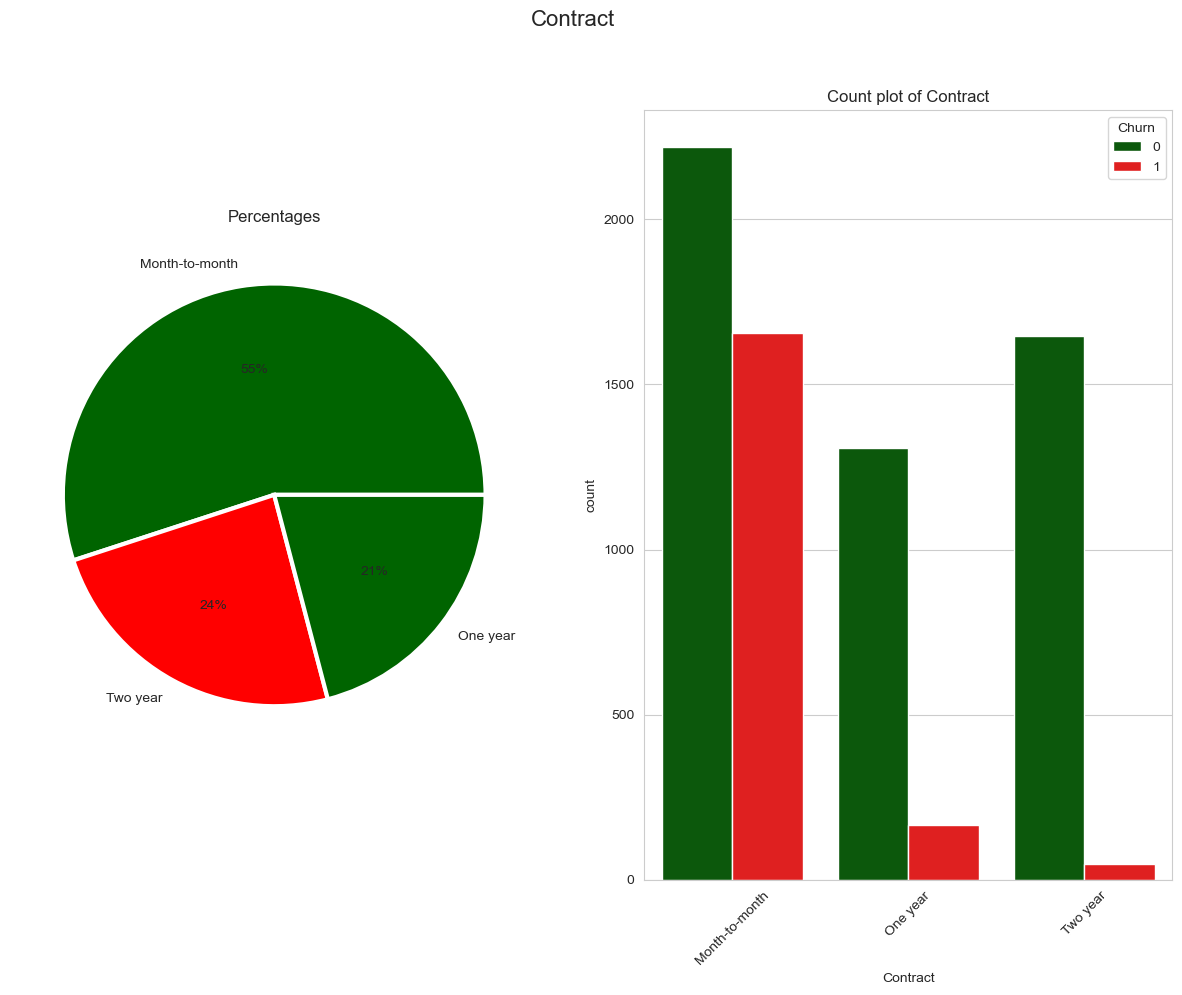

####################################################################################################
Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64


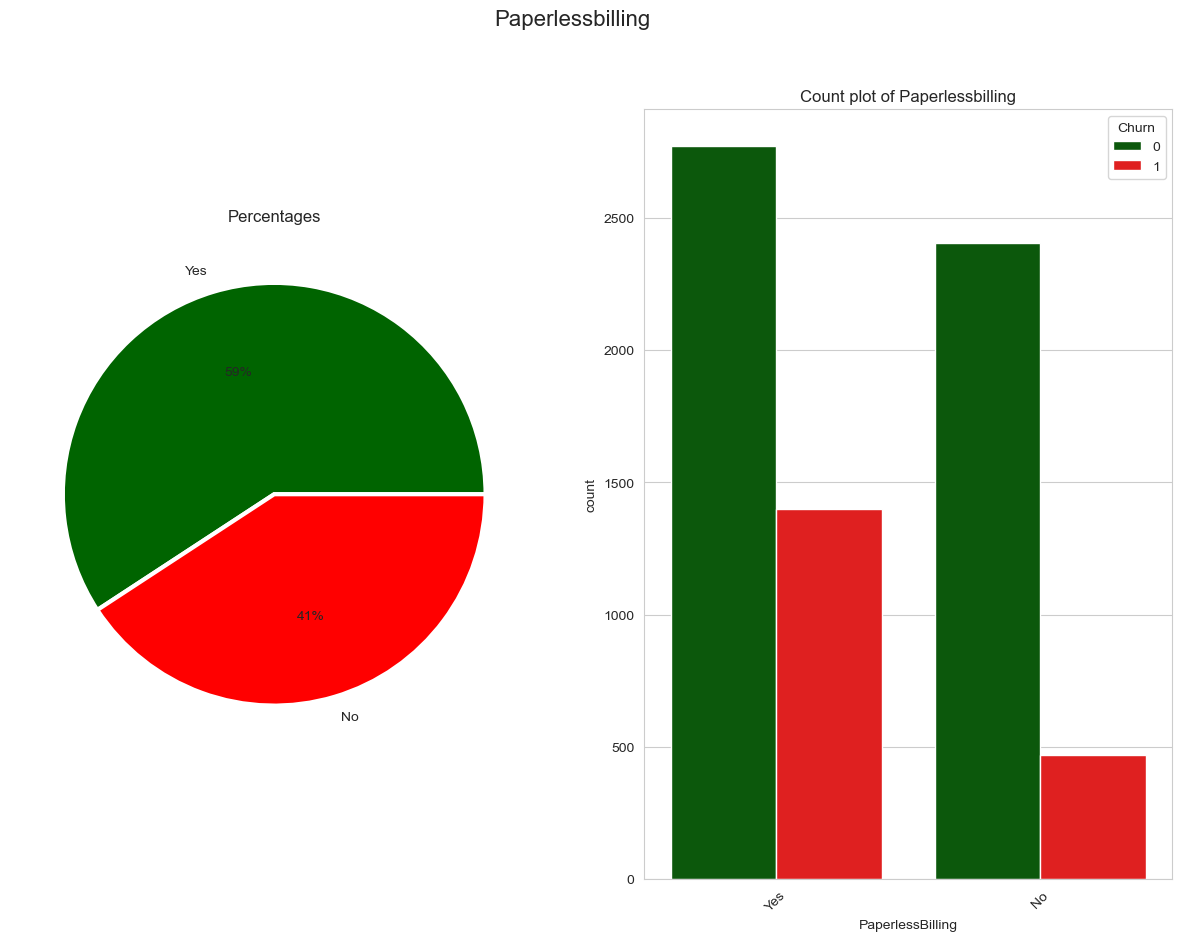

####################################################################################################
Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64


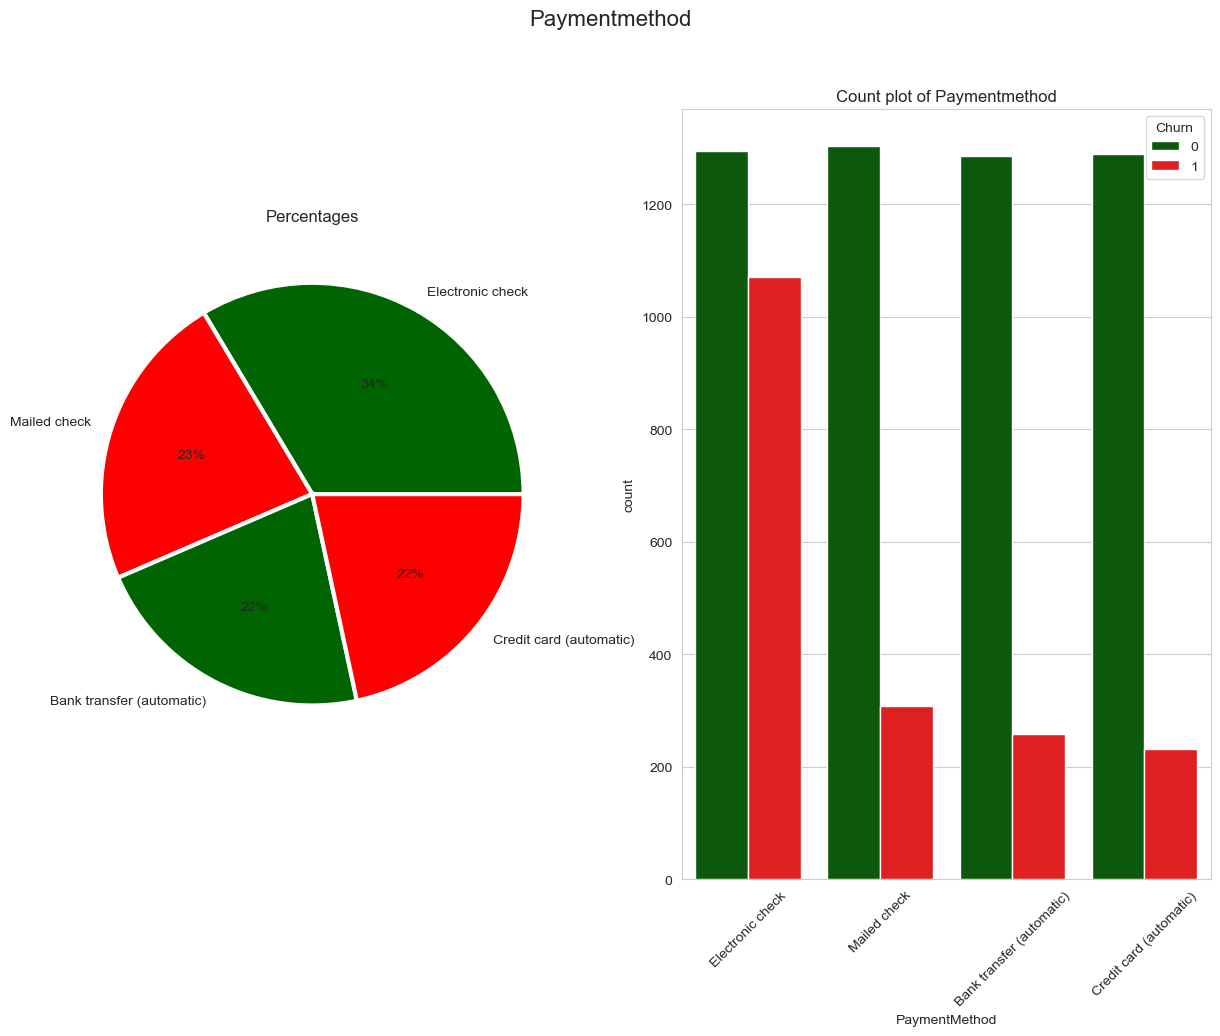

In [43]:
# Bivariate analysis categorical data vs target label
def cat_plots(dataframe, cat_col, target):
    print("".center(100, "#"))
    print(dataframe[cat_col].value_counts())

    value = dataframe[cat_col].value_counts().keys().tolist()

    plt.figure(figsize=(15, 10))
    sns.set_style("whitegrid")
    plt.suptitle(cat_col.capitalize(), size=16)
    plt.subplot(1, 2, 1)
    plt.title("Percentages")
    plt.pie(dataframe[cat_col].value_counts().values.tolist(),
            labels=dataframe[cat_col].value_counts().keys().tolist(),
            labeldistance=1.1,
            wedgeprops={'linewidth': 3, 'edgecolor': 'white'},
            colors=cat_feat_colors,
            autopct='%1.0f%%')

    plt.subplot(1, 2, 2)
    sns.countplot(data=dataframe, x=cat_col, hue=target, palette=cat_feat_colors)
    plt.title(f"Count plot of {cat_col.capitalize()}")
    plt.xticks(rotation=45)
    plt.show(block=True)

for col in cat_cols:
    cat_plots(df, col, "Churn")

**Conclusion**
- 75% of customers with "Month-to-Month" contracts choose to move compared to 13% of customers with "One Year" contracts and 3% of customers with "Two Year" contracts.
- Most of the customers using "Electronic Check" as their Payment Method have moved while those who chose the "Mailed Check", "Bank Transfer", and "Credit Card" payment methods are less for Churn.
- "Fiber Optic" internet service is the most preferred by customers (44%), but has the highest Churn rate among other internet services
- Customers with protection services such as OnlineBackup, OnlineSecurity, and Device Protection have lower Churn rates.

In [50]:
#Saving the df_dummies data for model building
df_dummies.to_csv('telco_churn.csv',index=False)

